<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Joseph Nelson (DC), Matt Brems (DC)_

---

In this lab you will hone your EDA skills and practice constructing simple linear regressions using a dataset on Sacramento real estate sales.  The dataset contains information on qualities of the property, location of the property, and time of sale.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

% matplotlib inline

### 1. Read in the Sacramento housing data set.

In [5]:
sac = pd.read_csv('/Users/Mahendra/desktop/GA/hw/4.1.2_regression-simple_linear_regression-lab/datasets/sacramento_real_estate_transactions.csv')
sac


,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
5,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813
6,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705
7,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367
8,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555
9,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146,Residential,Wed May 21 00:00:00 EDT 2008,98937,38.700909,-121.442979


### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set we give you. If you find yourself checking for, say, missing/corrupted data over and over, it might be to your long-term benefit to have a function that you can re-use every time you're given some new data.

In [6]:
# A:
sac.columns

Index([u'street', u'city', u'zip', u'state', u'beds', u'baths', u'sq__ft',
       u'type', u'sale_date', u'price', u'latitude', u'longitude'],
      dtype='object')

In [8]:
sac.rename(columns={'sq__ft':'sq_ft'},inplace=True)

In [9]:
sac.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq_ft          int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [10]:
sac.state.unique()

array(['CA', 'AC'], dtype=object)

In [11]:
sac.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq_ft        0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [12]:
sac.describe()

,zip,beds,baths,sq_ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,85.176072,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,95603.000000,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,95660.000000,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


In [13]:
sac.city.value_counts()

SACRAMENTO         439
ELK GROVE          114
LINCOLN             72
ROSEVILLE           48
CITRUS HEIGHTS      35
ANTELOPE            33
RANCHO CORDOVA      28
EL DORADO HILLS     23
NORTH HIGHLANDS     21
GALT                21
CARMICHAEL          20
ROCKLIN             17
FOLSOM              17
RIO LINDA           13
ORANGEVALE          11
PLACERVILLE         10
CAMERON PARK         9
FAIR OAKS            9
AUBURN               5
WILTON               5
ELVERTA              4
GOLD RIVER           4
RANCHO MURIETA       3
GRANITE BAY          3
WEST SACRAMENTO      3
POLLOCK PINES        3
EL DORADO            2
LOOMIS               2
MEADOW VISTA         1
SLOUGHHOUSE          1
WALNUT GROVE         1
PENRYN               1
MATHER               1
COOL                 1
SHINGLE SPRINGS      1
FORESTHILL           1
DIAMOND SPRINGS      1
GARDEN VALLEY        1
GREENWOOD            1
Name: city, dtype: int64

In [16]:
len(sac[sac['beds']==0])

108

In [17]:
len(sac[sac['baths']==0])

108

In [21]:
len(sac[(sac['beds']==0)&(sac['baths']==0)])

108

In [25]:
len(sac[(sac['beds']==0)&(sac['baths']==0)&(sac['sq_ft']==0)])


108

In [27]:
sac[sac['price']<=0]

,street,city,zip,state,beds,baths,sq_ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [29]:
sac[sac['sq_ft']<0]

,street,city,zip,state,beds,baths,sq_ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [30]:
#price and sqft cant be -ve. so dropping it

sac.drop(703,inplace=True)

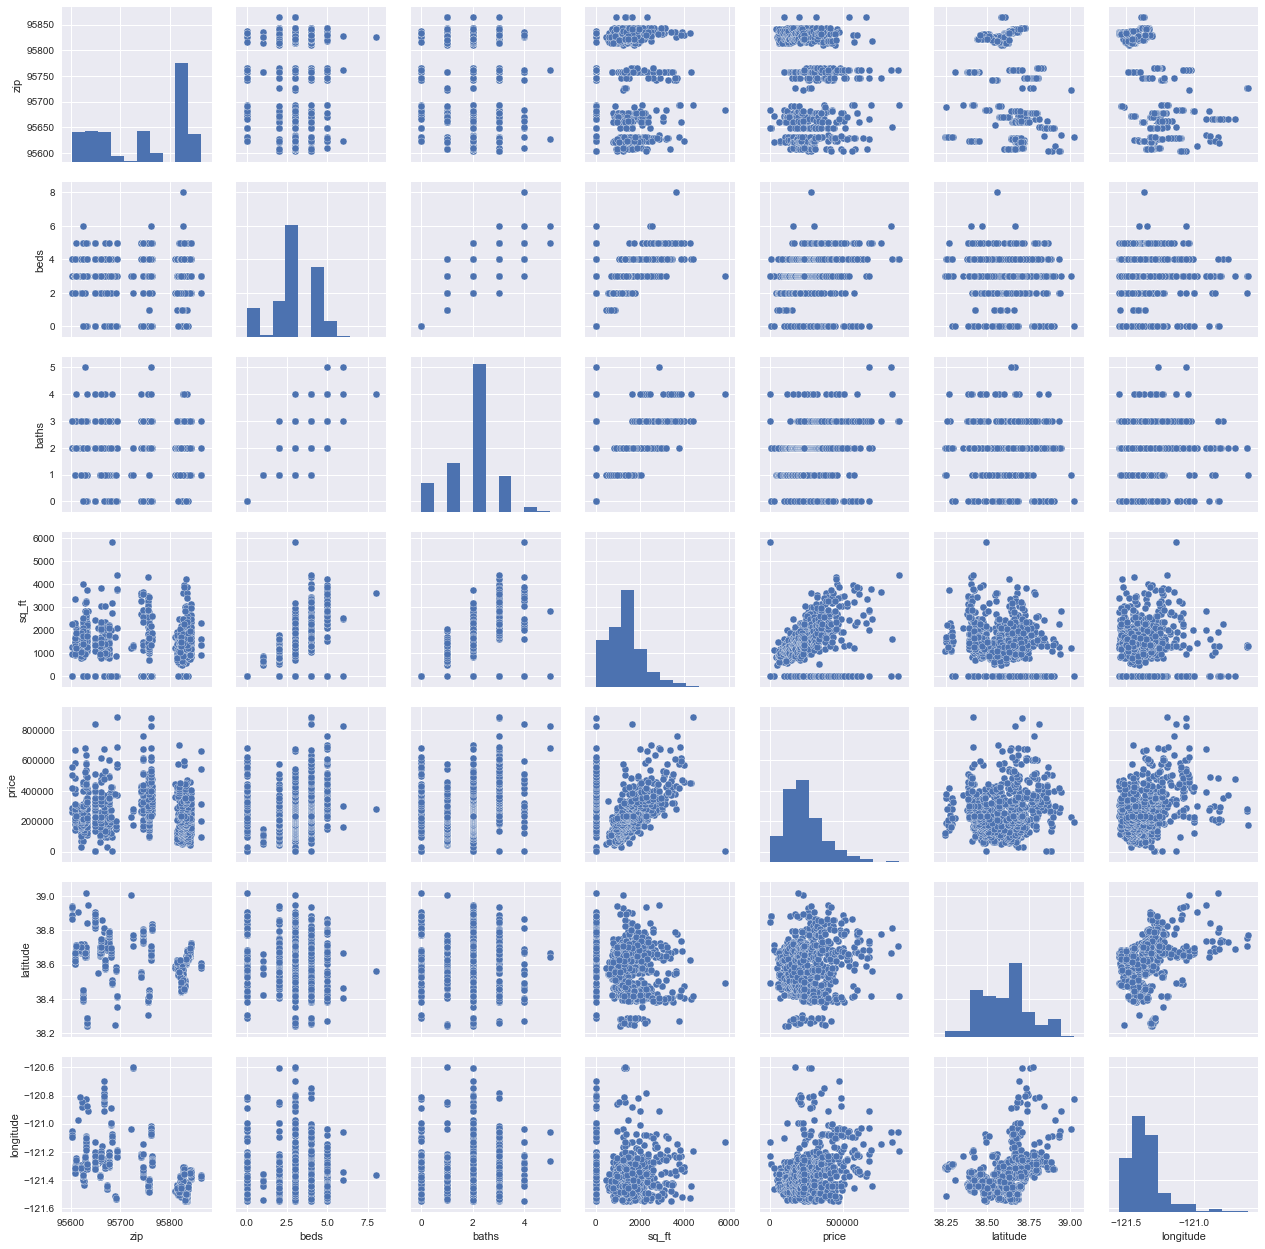

In [33]:
# A
import seaborn as sns
sns.pairplot(sac)

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in a SLR model. 

**For each of these variables you believe to be valid potential predictors in an SLR model, generate a plot showing the relationship between the independent variable and dependent variable.**

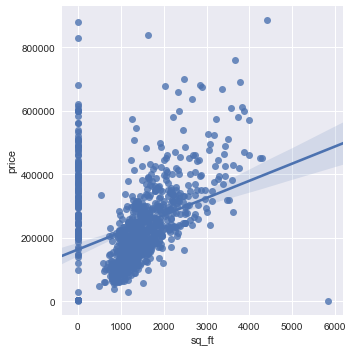

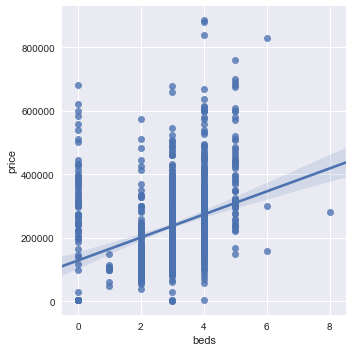

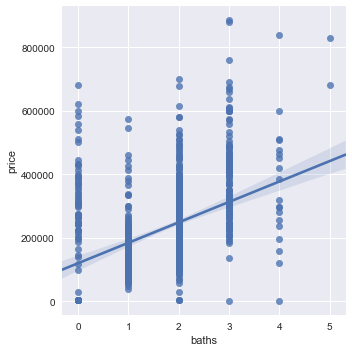

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

sns.lmplot(x='sq_ft', y='price', data=sac)
plt.show()
sns.lmplot(x='beds', y='price', data=sac)
plt.show()
sns.lmplot(x='baths', y='price', data=sac)
plt.show()


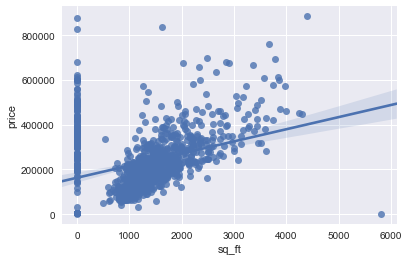

In [39]:
sns.regplot(x='sq_ft', y='price',data=sac)

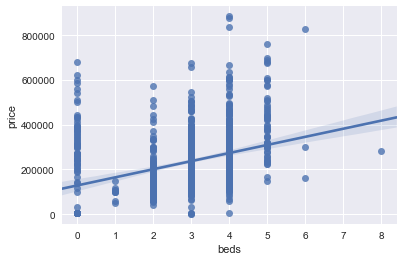

In [41]:
sns.regplot(x='beds', y='price',data=sac)

### 4. Which variable would be the best predictor of Y in a SLR model? Why?

In [5]:
# A:sq_ft.Because in the plot all the points are near to the slope

### 5. Build a function that will take in two lists `Y` and `X` and returns the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [58]:
# A:
def slope_intercept(x,y):
    slope=scipy.stats.pearsonr(x,y)[0]*(np.std(y)/np.std(x))
    intercept=np.mean(y)-(slope*np.mean(x))
    return slope,intercept
    print "slope:", slope
    print "intercept:",intercept

### 6. Interpret the intercept. Interpret the slope.

In [59]:
# A:
import scipy.stats
x=sac['sq_ft']
y=sac['price']
scipy.stats.linregress(x,y)

LinregressResult(slope=54.156197522957697, intercept=162938.73756098619, rvalue=0.33386111603727409, pvalue=4.7684606918739018e-27, stderr=4.8793759090741897)

In [60]:
slope_intercept(x,y)

(54.15619752295764, 162938.73756098631)

### 7. Give an example of how this model could be used for prediction and how this model could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [8]:
# A:

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [62]:
# A:
y_pred=[]
for x in sac['sq_ft']:
    y=54.15619752295769*x + 162938.73756098619
    y_pred.append(y)


In [65]:
sac['pred']=y_pred
#y-y1
sac['Residuals']=sac['price']-sac['pred']

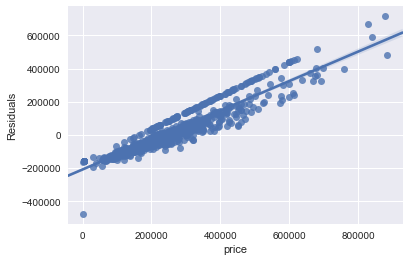

In [67]:
sns.regplot(x='price',y='Residuals',data=sac)